In [1]:
import numpy as np
import pandas as pd
import folium, html, json
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')


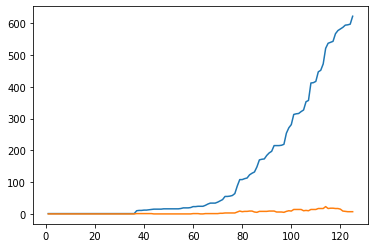

In [3]:
df1 = df[df['city']=='Santa Gertrudes']
plt.plot(df1.day,df1.cases)
plt.plot(df1.day,df1.avg7_cases)
# plt.plot(df.day,df.deaths)

In [4]:
df.tail()

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand,%var_avg7_case_day_thousand,%var_avg7_death_day_thousand
533499,2020-08-14,TO,Xambioá,city,611,8,89,False,11540,1722107,...,0.693,0.260,0.0,4,0,1.33,0.384,0.0,6.90,0.0
533500,2020-08-15,TO,Xambioá,city,611,8,90,False,11540,1722107,...,0.693,0.000,0.0,4,0,1.32,0.347,0.0,-9.68,0.0
533501,2020-08-16,TO,Xambioá,city,611,8,91,False,11540,1722107,...,0.693,0.000,0.0,2,0,1.32,0.173,0.0,-50.00,0.0
533502,2020-08-17,TO,Xambioá,city,639,8,92,False,11540,1722107,...,0.693,2.426,0.0,5,0,1.31,0.483,0.0,178.57,0.0
533503,2020-08-18,TO,Xambioá,city,647,8,93,True,11540,1722107,...,0.693,0.693,0.0,6,0,1.30,0.569,0.0,17.95,0.0


In [5]:
# df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
# df['date'] = df['date'].astype('datetime64[ns]')


In [10]:
df2 = df[(df['state']=='SP')]# and (df['place_type']=='state')]
# df2 = df2[(df2['place_type']=='state')]
df2 = df2[(df2['city']=='São Paulo')]
local = 'SP'
df2[['date','day','cases','deaths','case_day','death_day','avg7_deaths']].tail()

,date,day,cases,deaths,case_day,death_day,avg7_deaths
514665,2020-08-14,163,233987,10563,2784,110,78
514666,2020-08-15,164,235519,10592,1532,29,72
514667,2020-08-16,165,235866,10605,347,13,72
514668,2020-08-17,166,236163,10625,297,20,74
514669,2020-08-18,167,237934,10700,1771,75,68


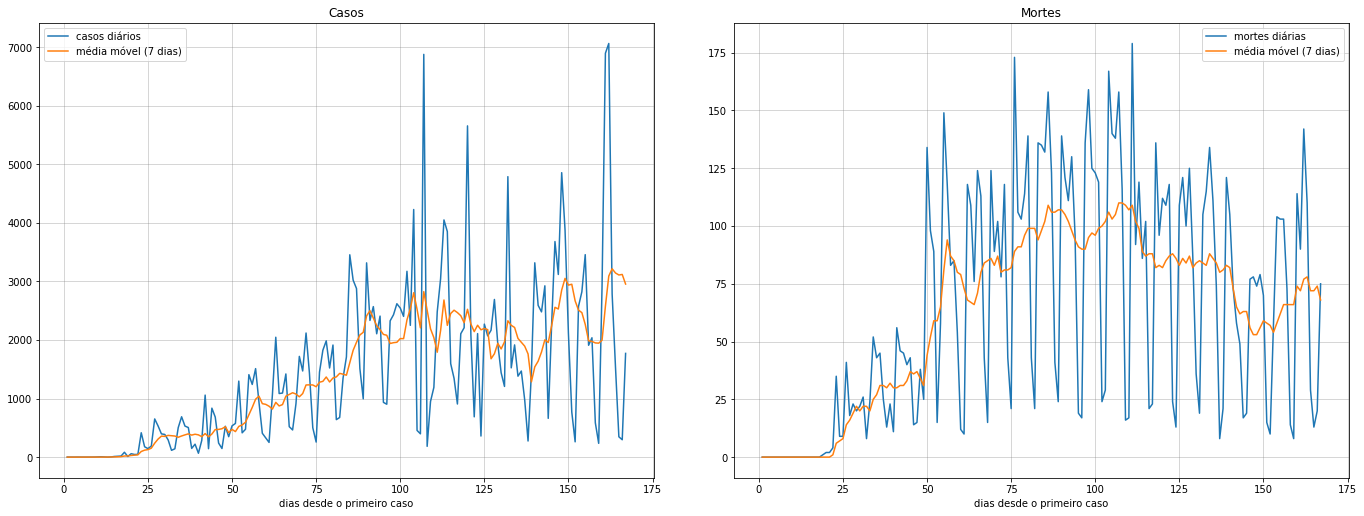

In [11]:
fig, ((ax3, ax4)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)


ax3.set_title("Casos")
ax3.set_xlabel("dias desde o primeiro caso")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df2.day, df2.case_day, label = 'casos diários')
ax3.plot(df2.day, df2.avg7_cases, label = 'média móvel (7 dias)')

ax4.set_title("Mortes")
ax4.set_xlabel("dias desde o primeiro caso")
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df2.day, df2.death_day, label = 'mortes diárias')
ax4.plot(df2.day, df2.avg7_deaths, label = 'média móvel (7 dias)')

ax3.legend()
ax4.legend()


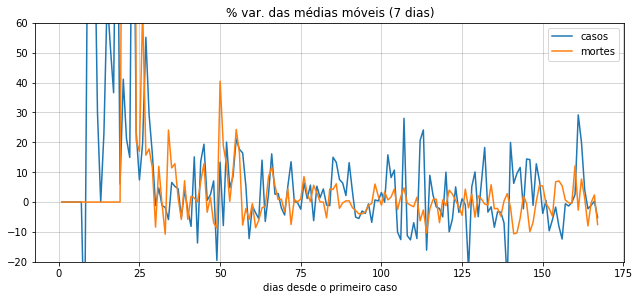

In [13]:
fig, ((ax3)) = plt.subplots(1,1, figsize=(10, 5))
fig.tight_layout(pad=5.0)

ax3.set_title("% var. das médias móveis (7 dias)")
ax3.set_xlabel("dias desde o primeiro caso")
ax3.grid(color='gray', alpha = 0.4)
ax3.set_ylim(-20,60)
ax3.plot(df2.day, df2['%var_avg7_case_day_thousand'], label = 'casos')
ax3.plot(df2.day, df2['%var_avg7_death_day_thousand'], label = 'mortes')

ax3.legend()

# País

In [14]:
df = pd.read_csv('../data/world_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')

In [15]:
df_br = df[df['country']=='Brazil']

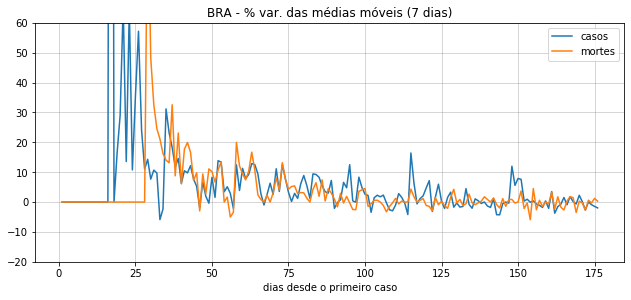

In [16]:
fig, ((ax3)) = plt.subplots(1,1, figsize=(10, 5))
fig.tight_layout(pad=5.0)

ax3.set_title("BRA - % var. das médias móveis (7 dias)")
ax3.set_xlabel("dias desde o primeiro caso")
ax3.grid(color='gray', alpha = 0.4)
ax3.set_ylim(-20,60)
# ax3.set_yticks(np.arange(-40, 200, step=20))
ax3.plot(df_br.day, df_br['%var_avg7_case_day_million'], label = 'casos')
ax3.plot(df_br.day, df_br['%var_avg7_death_day_million'], label = 'mortes')

ax3.legend()

In [17]:
ax3.set_title("Cases in Brazil")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df_br.day, df_br.case_day, label = 'daily cases')
ax3.plot(df_br.day, df_br.avg7_cases, label = 'moving average')

ax4.set_title("Deaths in Brazil")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df_br.day, df_br.death_day, label = 'daily deaths')
ax4.plot(df_br.day, df_br.avg7_deaths, label = 'moving average')


KeyError: 'state'

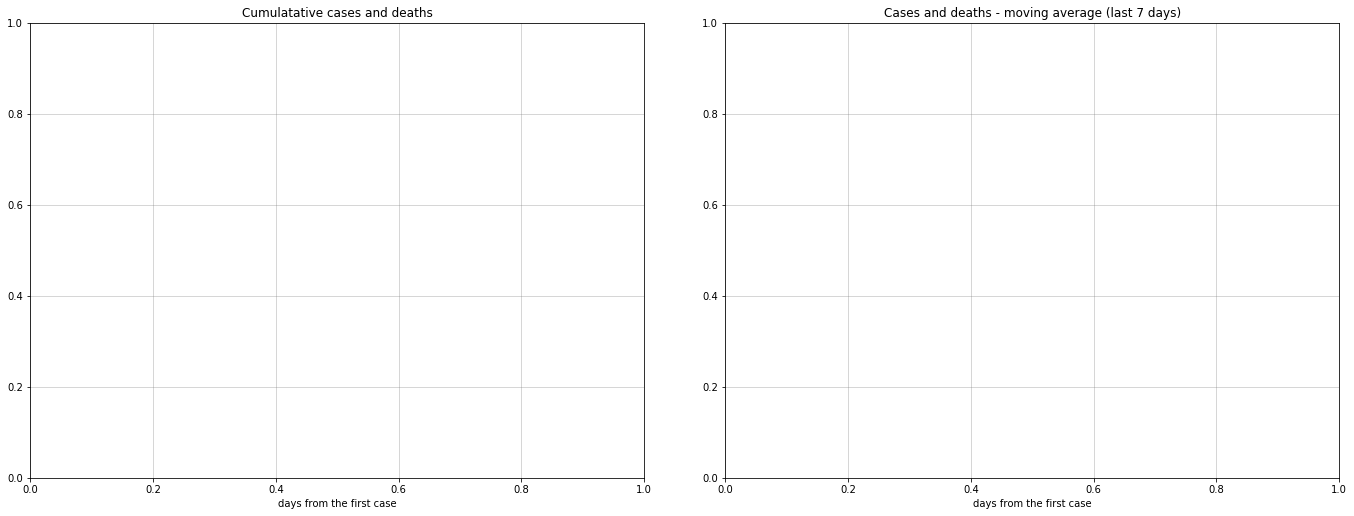

In [18]:

# Selected cities
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulatative cases and deaths")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Cases and deaths - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

dados = df[(df['state'] == 'SP') & (df['place_type']=='state')]

ax1.plot(dados.day, dados.cases, label = 'cases')
ax1.plot(dados.day, dados.deaths, label = 'deaths')
ax2.plot(dados.day, dados.avg7_cases, label = 'cases')
ax2.plot(dados.day, dados.avg7_deaths, label = 'deaths')

ax1.axvline(x=91, ymin=0, ymax=0.9, color = 'green', linestyle = '-',label = 'anúncio')
ax1.axvline(x=91+7, ymin=0, ymax=0.9, color = 'green', linestyle = ':',label = 'anúncio + 7')
ax1.axvline(x=96, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura')
ax1.axvline(x=96+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura + 7')

ax2.axvline(x=91, ymin=0, ymax=0.9, color = 'purple', linestyle = '-',label = 'anúncio')
ax2.axvline(x=91+14, ymin=0, ymax=0.9, color = 'purple', linestyle = '-.',label = 'anúncio + 14')
ax2.axvline(x=96, ymin=0, ymax=0.9, color = 'orange', linestyle = '-',label = 'reabertura')
ax2.axvline(x=96+14, ymin=0, ymax=0.9, color = 'orange', linestyle = '--',label = 'reabertura + 14')

ax1.legend()
ax2.legend()
# fig.savefig('../analysis/saoPaulo_cases_deaths.png')